<a target="_blank" href="https://colab.research.google.com/github/phitterio/phitter-kernel/blob/main/utilities/tutorials/fit_accelerate.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 

In [ ]:
import sys
import os

In [1]:
if os.getenv("COLAB_RELEASE_TAG"):
   !pip install phitter --quiet
else:
   sys.path.append("../../")

In [2]:
import phitter

In [3]:
distribution = phitter.continuous.NAKAGAMI(init_parameters_examples=True)
data = distribution.sample(1000000)

In [4]:
phitter_cont = phitter.PHITTER(data=data, subsample_estimation_size=10000)
phitter_cont.fit(n_workers=2)

In [5]:
phitter_cont.best_distribution

{'id': 'generalized_gamma_4p',
 'parameters': {'a': 1.6001211266854407,
  'd': 21.309880852207815,
  'p': 2.0193249540924176,
  'loc': 0.05822515157241647}}

In [6]:
phitter_cont.df_sorted_distributions_sse.head()

distribution passed       sse  \
                                           
0  generalized_gamma_4p      ✅  0.000058   
1                  beta      ✅  0.000059   
2     generalized_gamma      ✅  0.000060   
3              nakagami      ✅  0.000060   
4              gamma_3p      ❌  0.000123   

                                     parameters     chi_square                 \
                                                test_statistic critical_value   
0      a: 1.6, d: 21.31, p: 2.019, loc: 0.05823      38.811494      35.172462   
1  alpha: 45.76, beta: 120, A: -1.073, B: 21.43      35.584000      35.172462   
2                  a: 1.576, d: 21.94, p: 2.005      37.995331      36.415029   
3                              m: 11, omega: 27      38.313240      37.652484   
4       alpha: 168.1, loc: -4.96, beta: 0.06007      73.539300      36.415029   

                         kolmogorov_smirnov                                    \
        p_value rejected     test_statistic critical_value   p_value rejected   
0  2.080630e-02     True           0.000912       0.001358  0.376010    False   
1  4.546493e-02     True           0.000874       0.001358  0.429969    False   
2  3.471081e-02     True           0.000931       0.001358  0.351634    False   
3  4.310441e-02     True           0.000919       0.001358  0.367154    False   
4  6.284632e-07     True           0.001730       0.001358  0.005036     True   

  anderson_darling                                    
    test_statistic critical_value   p_value rejected  
0         0.516879       2.492233  0.729654    False  
1         0.461853       2.492233  0.785931    False  
2         0.520113       2.492233  0.726382    False  
3         0.500223       2.492233  0.746590    False  
4         3.127835       2.492233  0.023580     True

In [7]:
phitter_cont.plot_histogram()

In [8]:
phitter_cont.plot_histogram_distributions()

In [9]:
phitter_cont.plot_distribution("nakagami")

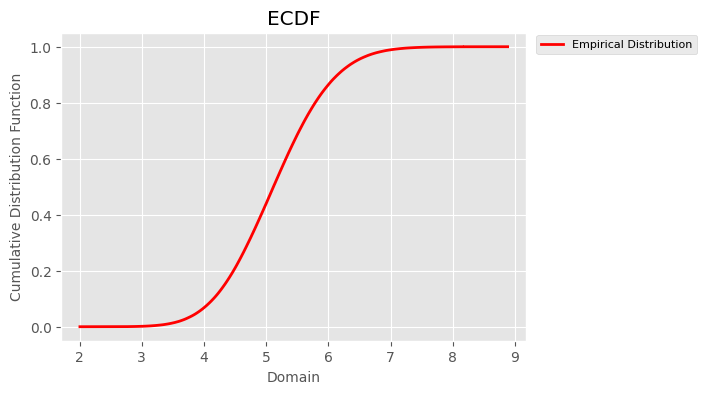

In [10]:
phitter_cont.plot_ecdf()

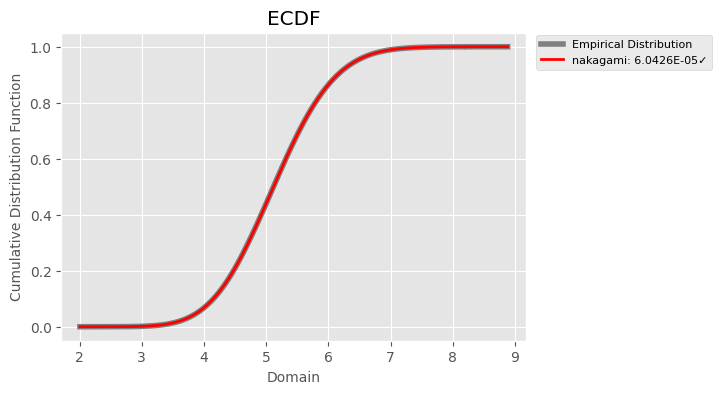

In [11]:
phitter_cont.plot_ecdf_distribution("nakagami")

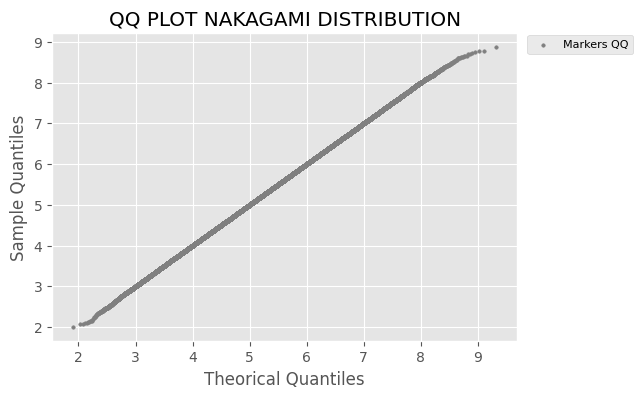

In [12]:
phitter_cont.qq_plot("nakagami")

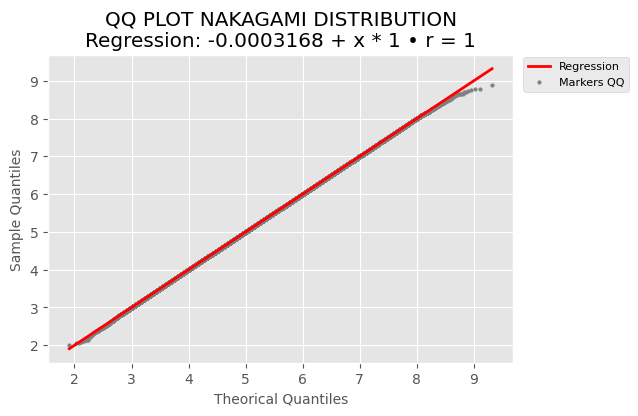

In [13]:
phitter_cont.qq_plot_regression("nakagami")